# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Feature Engineering</center>
### <center> Práctica Transformación de datos</center>

In [ ]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as skp 

from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import (
    KBinsDiscretizer,
    LabelEncoder,
    MinMaxScaler,
    Normalizer,
    OneHotEncoder,
    OrdinalEncoder,
    PowerTransformer,
    RobustScaler,
    StandardScaler,
)

pd.options.display.max_columns = None

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Preparación del Dataset

In [ ]:
df = pd.read_csv("sample_data/viajes_bicicleta_caba_2021 (1).csv")

In [ ]:
df.shape

(6003, 16)

In [ ]:
df.head()

,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta
0,10758473BAEcobici,591,2021-04-10 20:38:24 UTC,2BAEcobici,002 - Retiro I,"Ramos Mejia, Jose Maria, Dr. Av. & Del Liberta...",-58.374715,-34.592423,2021-04-10 20:48:15 UTC,95BAEcobici,095 - ESMERALDA,ESMERALDA 516,-58.378168,-34.602112,86840BAEcobici,A
1,10757803BAEcobici,1321,2021-04-10 16:34:08 UTC,2BAEcobici,002 - Retiro I,"Ramos Mejia, Jose Maria, Dr. Av. & Del Liberta...",-58.374715,-34.592423,2021-04-10 16:56:09 UTC,73BAEcobici,073 - Ruy Díaz de Guzmán,Avenida Martin Garcia y Ruy Díaz de Guzmán,-58.371823,-34.630681,52860BAEcobici,A
2,10756603BAEcobici,380,2021-04-10 07:06:00 UTC,3BAEcobici,003 - ADUANA,Moreno & Av Paseo Colon,-58.368260,-34.611032,2021-04-10 07:12:20 UTC,150BAEcobici,150 - RODRIGO BUENO,Av. España 2200,-58.355465,-34.618755,375594BAEcobici,A
3,10756618BAEcobici,1436,2021-04-10 07:25:08 UTC,4BAEcobici,004 - Plaza Roma,Lavalle & Bouchard,-58.368781,-34.601822,2021-04-10 07:49:04 UTC,353BAEcobici,237 - Madero Office,"367 Sanchez De Thompson, Mariquita",-58.364695,-34.599036,489972BAEcobici,A
4,10757830BAEcobici,3736,2021-04-10 16:45:01 UTC,4BAEcobici,004 - Plaza Roma,Lavalle & Bouchard,-58.368781,-34.601822,2021-04-10 17:47:17 UTC,207BAEcobici,123 - BASUALDO Y RODO,Basualdo 1218,-58.492634,-34.649324,77965BAEcobici,A


### Transformación de variables

En esta sección mostraremos las principales estrategias para convertir variables según su tipo.

#### Conversion de variables categoricas

Hay veces que tenemos que trabajar un poco en las variables que tenemos para que puedan ser usadas en los modelos.

Los principales son:
* Ordinal Encoder
* Label Encoder
* One Hot Encoding

###### Ordinal Encoder

In [ ]:
oe = OrdinalEncoder(dtype='int')
columns_to_encode = ['modelo_bicicleta']
df_trabajo_oe=df.copy()

try:
    df_trabajo_oe[['modelo_bicicleta_encoded']] = oe.fit_transform( df_trabajo_oe[columns_to_encode] )
except Exception as exc:
    print(f'Error: {exc}')

In [ ]:
df_trabajo_oe[['modelo_bicicleta','modelo_bicicleta_encoded']].value_counts()

modelo_bicicleta  modelo_bicicleta_encoded
B                 1                           1963
C                 2                           1678
A                 0                           1380
D                 3                            982
dtype: int64

#### Label Encoder

Es exactamente la misma idea pero esperando una sola variable ya que se usa para encodear la variable target de un modelo predictivo

In [ ]:
le = LabelEncoder()
df_trabajo_le=df.copy()
# Convertimos nulos a string 'nan', es decir un valor posible mas
df_trabajo_le['modelo_bicicleta_label_encoded'] = le.fit_transform(df['modelo_bicicleta'].astype(str))

In [ ]:
df_trabajo_le[['modelo_bicicleta','modelo_bicicleta_label_encoded']].value_counts()

modelo_bicicleta  modelo_bicicleta_label_encoded
B                 1                                 1963
C                 2                                 1678
A                 0                                 1380
D                 3                                  982
dtype: int64

#### One Hot Encoding

In [ ]:
ohe = OneHotEncoder() 
df_trabajo_ohe=df.copy()

property_type_encoded = ohe.fit_transform(df_trabajo_ohe[['modelo_bicicleta']].astype(str)).todense().astype(int)

property_type_encoded = pd.DataFrame(property_type_encoded).add_prefix('modelo_bicicleta_')
#df_trabajo_ohe = pd.concat([df_trabajo_ohe, property_type_encoded], axis=1)
display(property_type_encoded)

,modelo_bicicleta_0,modelo_bicicleta_1,modelo_bicicleta_2,modelo_bicicleta_3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
5998,0,1,0,0
5999,0,1,0,0
6000,0,1,0,0
6001,0,1,0,0


Otra solución para OneHotEncoding implementada en pandas

In [ ]:
df_dummies = pd.get_dummies(df_trabajo_ohe, columns=['modelo_bicicleta'])
display(df_dummies.head(2))
print(df_dummies.shape)

,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta_A,modelo_bicicleta_B,modelo_bicicleta_C,modelo_bicicleta_D
0,10758473BAEcobici,591,2021-04-10 20:38:24 UTC,2BAEcobici,002 - Retiro I,"Ramos Mejia, Jose Maria, Dr. Av. & Del Liberta...",-58.374715,-34.592423,2021-04-10 20:48:15 UTC,95BAEcobici,095 - ESMERALDA,ESMERALDA 516,-58.378168,-34.602112,86840BAEcobici,1,0,0,0
1,10757803BAEcobici,1321,2021-04-10 16:34:08 UTC,2BAEcobici,002 - Retiro I,"Ramos Mejia, Jose Maria, Dr. Av. & Del Liberta...",-58.374715,-34.592423,2021-04-10 16:56:09 UTC,73BAEcobici,073 - Ruy Díaz de Guzmán,Avenida Martin Garcia y Ruy Díaz de Guzmán,-58.371823,-34.630681,52860BAEcobici,1,0,0,0


(6003, 19)


Para evitar problemas de colinealidad en los features se debe excluir una categoría del set (la ausencia de todas - vector de 0s - indica la presencia de la categoría faltante)
La función de pandas ya viene con una parámetro para esto drop_first=True:

In [ ]:
df_dummies = pd.get_dummies(df_trabajo_ohe, columns=['modelo_bicicleta'], drop_first=True)
display(df_dummies.head(2))
print(df_dummies.shape)

,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta_B,modelo_bicicleta_C,modelo_bicicleta_D
0,10758473BAEcobici,591,2021-04-10 20:38:24 UTC,2BAEcobici,002 - Retiro I,"Ramos Mejia, Jose Maria, Dr. Av. & Del Liberta...",-58.374715,-34.592423,2021-04-10 20:48:15 UTC,95BAEcobici,095 - ESMERALDA,ESMERALDA 516,-58.378168,-34.602112,86840BAEcobici,0,0,0
1,10757803BAEcobici,1321,2021-04-10 16:34:08 UTC,2BAEcobici,002 - Retiro I,"Ramos Mejia, Jose Maria, Dr. Av. & Del Liberta...",-58.374715,-34.592423,2021-04-10 16:56:09 UTC,73BAEcobici,073 - Ruy Díaz de Guzmán,Avenida Martin Garcia y Ruy Díaz de Guzmán,-58.371823,-34.630681,52860BAEcobici,0,0,0


(6003, 18)


### Numéricas

Vamos a trabajar con la variable duracion_recorrido

In [ ]:
df_scaler=df.loc[:,'duracion_recorrido'].to_frame()

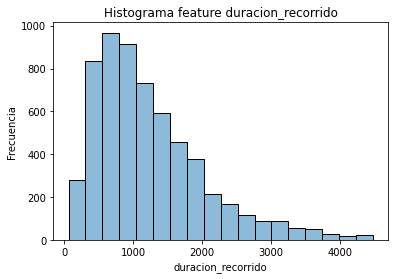

In [ ]:
sns_hist=sns.histplot(data=df_scaler['duracion_recorrido'], alpha = 0.5, bins=18).set(title="Histograma feature duracion_recorrido",xlabel="duracion_recorrido",ylabel="Frecuencia")
plt.show()

#### Transformaciones Min - Max

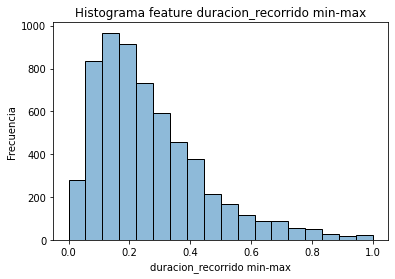

In [ ]:
min=df_scaler['duracion_recorrido'].min()
max=df_scaler['duracion_recorrido'].max()

df_scaler['duracion_recorrido_min_max']=(df_scaler['duracion_recorrido']-min)/(max-min)

sns_hist=sns.histplot(data=df_scaler['duracion_recorrido_min_max'], alpha = 0.5, bins=18).set(title="Histograma feature duracion_recorrido min-max",xlabel="duracion_recorrido min-max",ylabel="Frecuencia")
plt.show()

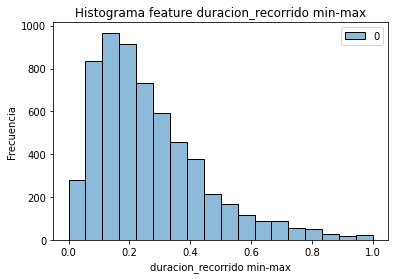

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
duracion_recorrido_min_max = scaler.fit_transform(df_scaler['duracion_recorrido'].to_frame())

sns_hist=sns.histplot(data=duracion_recorrido_min_max, alpha = 0.5, bins=18).set(title="Histograma feature duracion_recorrido min-max",xlabel="duracion_recorrido min-max",ylabel="Frecuencia")
plt.show()

#### Transformación z-score

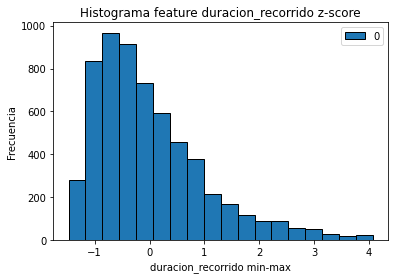

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler() 
duracion_recorrido_z_score = standard_scaler.fit_transform(df_scaler['duracion_recorrido'].to_frame())

sns_hist=sns.histplot(data=duracion_recorrido_z_score, alpha = 1, bins=18, color=[43,123,355]).set(title="Histograma feature duracion_recorrido z-score",xlabel="duracion_recorrido min-max",ylabel="Frecuencia")
plt.show()

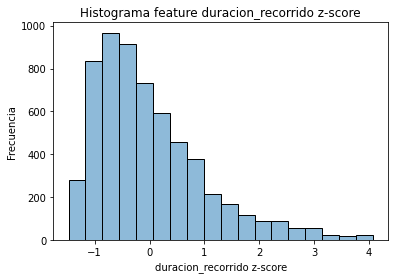

In [ ]:
std=df_scaler['duracion_recorrido'].std()
mean=df_scaler['duracion_recorrido'].mean()

df_scaler['duracion_recorrido_z_score']=(df_scaler['duracion_recorrido']-mean)/std

sns_hist=sns.histplot(data=df_scaler['duracion_recorrido_z_score'], alpha = 0.5, bins=18).set(title="Histograma feature duracion_recorrido z-score",xlabel="duracion_recorrido z-score",ylabel="Frecuencia")
plt.show()

### Transformación Decimal Scaling

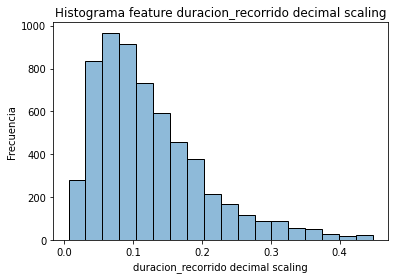

In [ ]:
d=len(str(int(df_scaler['duracion_recorrido'].max())))
df_scaler['duracion_recorrido_decimal_scaling']=df_scaler['duracion_recorrido']/10**d

sns_hist=sns.histplot(data=df_scaler['duracion_recorrido_decimal_scaling'], alpha = 0.5, bins=18).set(title="Histograma feature duracion_recorrido decimal scaling",xlabel="duracion_recorrido decimal scaling",ylabel="Frecuencia")
plt.show()

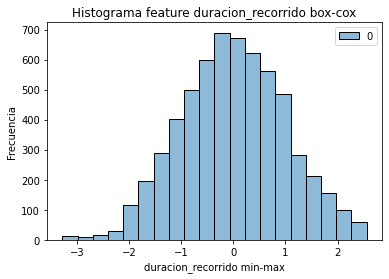

In [ ]:
from sklearn.preprocessing import PowerTransformer

power_scaler = PowerTransformer(method="box-cox") 
duracion_recorrido_power = power_scaler.fit_transform(df_scaler['duracion_recorrido'].to_frame())

sns_hist=sns.histplot(data=duracion_recorrido_power, alpha = 0.5,bins=20).set(title="Histograma feature duracion_recorrido box-cox",xlabel="duracion_recorrido min-max",ylabel="Frecuencia")
plt.show()

### Discretizaciones

Tranformación por la cual convertimos una variable continua en categórica

#### Binning

In [ ]:
df_discret=df.loc[:,'duracion_recorrido'].to_frame()

Límites bins: [array([  61.,  780., 1389., 4483.])]


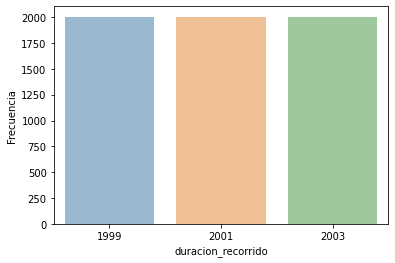

In [ ]:
enc = KBinsDiscretizer(n_bins=3, encode='ordinal' , strategy='quantile')
#‘ordinal’: Return the bin identifier encoded as an integer value
#‘quantile’: All bins in each feature have the same number of points.

_df = df_discret[['duracion_recorrido']].reset_index(drop=True)
X_binned = enc.fit_transform(_df)
X_binned = pd.DataFrame(X_binned.astype(int), columns=['duracion_recorrido_bins'])
result = pd.concat([_df, X_binned], axis=1)

#display(result.head(10))
print("Límites bins:", enc.bin_edges_)

ds_agrupado_duracion_recorrido=result.groupby(['duracion_recorrido_bins']).count()
eje_x = ds_agrupado_duracion_recorrido.index
eje_y = ds_agrupado_duracion_recorrido['duracion_recorrido']

sns_bar_plot=sns.barplot(eje_x,eje_y, data=ds_agrupado_duracion_recorrido['duracion_recorrido'],alpha=0.5).set(title="",ylabel='Frecuencia',xlabel='duracion_recorrido')
plt.show()

Utilizando pandas

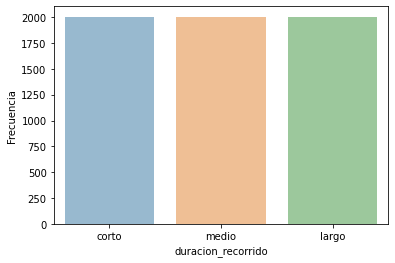

In [ ]:
labels=["corto","medio","largo"]

df_discret["duracion_recorrido_discret_igual_frec"]=pd.qcut(df_discret["duracion_recorrido"],q=3, labels=labels)

#Gráfico de barras con Seaborn
ds_agrupado_duracion_recorrido=df_discret.groupby(['duracion_recorrido_discret_igual_frec']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_duracion_recorrido.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_duracion_recorrido['duracion_recorrido'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_duracion_recorrido ,alpha=0.5).set(title="",ylabel='Frecuencia',xlabel='duracion_recorrido')
plt.show()

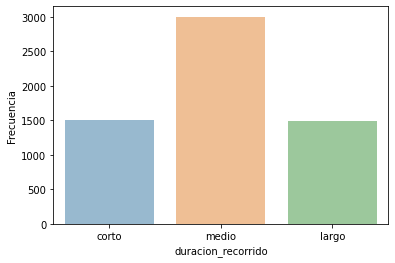

In [ ]:
labels=["corto","medio","largo"]
df_discret["duracion_recorrido_discret_q_libres"]=pd.qcut(df_discret["duracion_recorrido"],q=[0,0.25,0.75,1], labels=labels)

#Gráfico de barras con Seaborn
ds_agrupado_duracion_recorrido=df_discret.groupby(['duracion_recorrido_discret_q_libres']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_duracion_recorrido.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_duracion_recorrido['duracion_recorrido'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_duracion_recorrido ,alpha=0.5).set(title="",ylabel='Frecuencia',xlabel='duracion_recorrido')
plt.show()

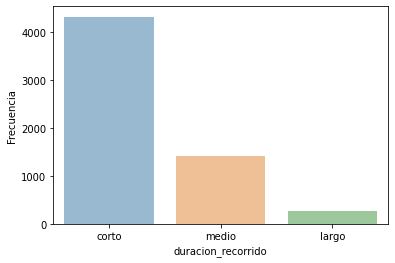

In [ ]:
labels=["corto","medio","largo"]
df_discret["duracion_recorrido_discret_igual_size"]=pd.cut(df_discret["duracion_recorrido"],bins=3, labels=labels)

df_discret["duracion_recorrido_discret_igual_size"].value_counts()

#Gráfico de barras con Seaborn
ds_agrupado_duracion_recorrido=df_discret.groupby(['duracion_recorrido_discret_igual_size']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_duracion_recorrido.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_duracion_recorrido['duracion_recorrido'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_duracion_recorrido ,alpha=0.5).set(title="",ylabel='Frecuencia',xlabel='duracion_recorrido')
plt.show()